In [1]:
import torch
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

In [2]:
 torch.manual_seed(0)

In [3]:
#hyper parameters
seq_length = 7
data_dim = 5
hidden_dim = 10
output_dim = 1
learning_rate = 0.01
iterations = 500

xy = np.loadtxt("data-02-stock_daily.csv", delimiter=",")
xy = xy[::-1]

train_size = int(len(xy) * 0.7)
train_set = xy[0:train_size]
test_set = xy[train_size - seq_length:]

## Data Reading

In [4]:
def minmax_scaler(data):
    numerator = data - np.min(data,0)
    denominator = np.max(data,0) - np.min(data, 0)
    return numerator / (denominator + 1e-7)

def build_dataset(time_series, seq_length):
    dataX = []
    dataY = []
    for i in range(0, len(time_series) - seq_length):
        _x = time_series[i:i + seq_length, :]
        _y = time_series[i + seq_length, [-1]]
        print(_x, "= >", _y)
        dataX.append(_x)
        dataY.append(_y)
    return np.array(dataX), np.array(dataY)

In [5]:
train_set = minmax_scaler(train_set)
test_set = minmax_scaler(test_set)

trainX, trainY = build_dataset(train_set, seq_length)
testX, testY = build_dataset(test_set, seq_length)

trainX_tensor = torch.FloatTensor(trainX)
trainY_tensor = torch.FloatTensor(trainY)

testX_tensor = torch.FloatTensor(testX)
testY_tensor = torch.FloatTensor(testY)

[[2.53065030e-01 2.45070970e-01 2.33983036e-01 4.66075110e-04
  2.32039560e-01]
 [2.29604366e-01 2.39728936e-01 2.54567513e-01 2.98467330e-03
  2.37426028e-01]
 [2.49235510e-01 2.41668371e-01 2.48338489e-01 2.59926504e-04
  2.26793794e-01]
 [2.21013495e-01 2.46602231e-01 2.54710584e-01 0.00000000e+00
  2.62668239e-01]
 [3.63433786e-01 3.70389871e-01 2.67168847e-01 1.24764722e-02
  2.62105010e-01]
 [2.59447633e-01 3.10673724e-01 2.74113889e-01 4.56323384e-01
  2.71751265e-01]
 [2.76008150e-01 2.78314566e-01 1.98470380e-01 5.70171193e-01
  1.78104644e-01]] = > [0.16053716]
[[2.29604366e-01 2.39728936e-01 2.54567513e-01 2.98467330e-03
  2.37426028e-01]
 [2.49235510e-01 2.41668371e-01 2.48338489e-01 2.59926504e-04
  2.26793794e-01]
 [2.21013495e-01 2.46602231e-01 2.54710584e-01 0.00000000e+00
  2.62668239e-01]
 [3.63433786e-01 3.70389871e-01 2.67168847e-01 1.24764722e-02
  2.62105010e-01]
 [2.59447633e-01 3.10673724e-01 2.74113889e-01 4.56323384e-01
  2.71751265e-01]
 [2.76008150e-01 2.783

 [0.09705138 0.0919186  0.08033324 0.15021063 0.06143361]] = > [0.0637571]
[[0.04347125 0.07929489 0.06672952 0.20263512 0.08973891]
 [0.09256622 0.13730964 0.11505845 0.23922201 0.14729971]
 [0.14124711 0.15718107 0.16267114 0.2038003  0.16687406]
 [0.15139061 0.14639476 0.15075011 0.13765349 0.15018676]
 [0.12185753 0.11815291 0.10965259 0.16994712 0.09181601]
 [0.09705138 0.0919186  0.08033324 0.15021063 0.06143361]
 [0.05640918 0.05142738 0.04883001 0.37450928 0.0637571 ]] = > [0.14775758]
[[0.09256622 0.13730964 0.11505845 0.23922201 0.14729971]
 [0.14124711 0.15718107 0.16267114 0.2038003  0.16687406]
 [0.15139061 0.14639476 0.15075011 0.13765349 0.15018676]
 [0.12185753 0.11815291 0.10965259 0.16994712 0.09181601]
 [0.09705138 0.0919186  0.08033324 0.15021063 0.06143361]
 [0.05640918 0.05142738 0.04883001 0.37450928 0.0637571 ]
 [0.07317664 0.14935503 0.10009434 0.50178363 0.14775758]] = > [0.12649332]
[[0.14124711 0.15718107 0.16267114 0.2038003  0.16687406]
 [0.15139061 0.1463

[[0.93855396 0.9663481  0.99831734 0.15748857 1.        ]
 [0.97274423 0.95824987 1.         0.11521018 0.98028509]
 [0.94824869 0.93068879 0.96935611 0.13280452 0.93761622]
 [0.85682139 0.8441263  0.87240529 0.29263243 0.87762638]
 [0.86872423 0.87114305 0.89883214 0.17413283 0.88023154]
 [0.81197026 0.85474244 0.86403545 0.1738012  0.88389282]
 [0.81303978 0.82520778 0.82873774 0.26492785 0.82323407]] = > [0.78126914]
[[0.97274423 0.95824987 1.         0.11521018 0.98028509]
 [0.94824869 0.93068879 0.96935611 0.13280452 0.93761622]
 [0.85682139 0.8441263  0.87240529 0.29263243 0.87762638]
 [0.86872423 0.87114305 0.89883214 0.17413283 0.88023154]
 [0.81197026 0.85474244 0.86403545 0.1738012  0.88389282]
 [0.81303978 0.82520778 0.82873774 0.26492785 0.82323407]
 [0.81697293 0.80727594 0.80704359 0.21896567 0.78126914]] = > [0.78676138]
[[0.94824869 0.93068879 0.96935611 0.13280452 0.93761622]
 [0.85682139 0.8441263  0.87240529 0.29263243 0.87762638]
 [0.86872423 0.87114305 0.89883214 0

 [0.50476598 0.55443551 0.5284312  0.16384949 0.5747565 ]] = > [0.61507668]
[[0.65307837 0.70101376 0.6566222  0.3758363  0.69918169]
 [0.72040036 0.70067774 0.53854826 0.7741665  0.56328776]
 [0.51279887 0.52154452 0.5276436  0.33694254 0.51227539]
 [0.5071637  0.50427336 0.38927453 0.56760283 0.4051133 ]
 [0.45542816 0.5429768  0.50698499 0.32710263 0.53897613]
 [0.50476598 0.55443551 0.5284312  0.16384949 0.5747565 ]
 [0.57502538 0.59180672 0.61154929 0.13063978 0.61507668]] = > [0.55122145]
[[0.72040036 0.70067774 0.53854826 0.7741665  0.56328776]
 [0.51279887 0.52154452 0.5276436  0.33694254 0.51227539]
 [0.5071637  0.50427336 0.38927453 0.56760283 0.4051133 ]
 [0.45542816 0.5429768  0.50698499 0.32710263 0.53897613]
 [0.50476598 0.55443551 0.5284312  0.16384949 0.5747565 ]
 [0.57502538 0.59180672 0.61154929 0.13063978 0.61507668]
 [0.60170251 0.60536397 0.5859233  0.17521758 0.55122145]] = > [0.60295095]
[[0.51279887 0.52154452 0.5276436  0.33694254 0.51227539]
 [0.5071637  0.504

## Neural Net Setting

In [6]:
class Net(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, layers):
        super(Net, self).__init__()
        self.rnn = torch.nn.LSTM(input_dim, hidden_dim, num_layers = layers, batch_first = True)
        self.fc = torch.nn.Linear(hidden_dim, output_dim, bias = True)
    
    def forward(self, x):
        x, _status = self.rnn(x)
        x = self.fc(x[:,-1])
        return x

In [7]:
net = Net(data_dim, hidden_dim, output_dim, 1)

## loss & optimizer setting

In [8]:
criterion = torch.nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr = learning_rate)

## Training & Evaluation

0 0.2271038293838501
1 0.18340936303138733
2 0.15106433629989624
3 0.12612314522266388
4 0.10598734766244888
5 0.08915018290281296
6 0.07493707537651062
7 0.06327902525663376
8 0.05449603125452995
9 0.049023859202861786
10 0.046934422105550766
11 0.04731707274913788
12 0.048382632434368134
13 0.04839477688074112
14 0.046337664127349854
15 0.042077720165252686
16 0.036201704293489456
17 0.029662014916539192
18 0.023386558517813683
19 0.018011244013905525
20 0.01380066480487585
21 0.010714656673371792
22 0.008532218635082245
23 0.006976508069783449
24 0.005824481602758169
25 0.004987423308193684
26 0.004524713847786188
27 0.004554683808237314
28 0.005089897662401199
29 0.005920967552810907
30 0.006684894207865
31 0.007072674576193094
32 0.006973990239202976
33 0.006471903994679451
34 0.005753520876169205
35 0.00501469150185585
36 0.004395289346575737
37 0.003953744191676378
38 0.003676638239994645
39 0.0035109841264784336
40 0.0034013076219707727
41 0.0033151088282465935
42 0.00324889481

335 0.0014325982192531228
336 0.0014310459373518825
337 0.001429500407539308
338 0.0014279611641541123
339 0.0014264289056882262
340 0.0014249020023271441
341 0.0014233820838853717
342 0.0014218679862096906
343 0.001420359592884779
344 0.0014188577188178897
345 0.0014173622475937009
346 0.0014158725971356034
347 0.0014143891166895628
348 0.001412911107763648
349 0.0014114396180957556
350 0.0014099740656092763
351 0.0014085143338888884
352 0.00140706030651927
353 0.0014056122163310647
354 0.0014041704125702381
355 0.0014027345459908247
356 0.0014013045001775026
357 0.00139988015871495
358 0.0013984614051878452
359 0.0013970491709187627
360 0.0013956426410004497
361 0.0013942421646788716
362 0.0013928471598774195
363 0.001391459023579955
364 0.0013900760095566511
365 0.0013887000968679786
366 0.001387329655699432
367 0.0013859657337889075
368 0.0013846073998138309
369 0.001383255235850811
370 0.0013819104060530663
371 0.001380571979098022
372 0.0013792392564937472
373 0.00137791316956281

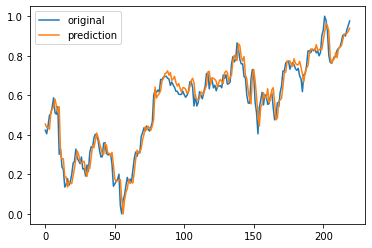

In [9]:
for i in range(iterations):
    
    outputs = net(trainX_tensor)
    loss = criterion(outputs, trainY_tensor)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print(i, loss.item())

plt.plot(testY)
plt.plot(net(testX_tensor).data.numpy())
plt.legend(['original', 'prediction'])
plt.show()